In [1]:
import utils

mols, spectra = utils.gnps_parser('data/pos_processed_gnps_shuffled_with_3d_train.tsv')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144885/144885 [01:11<00:00, 2023.95it/s]


In [19]:
from rdkit.Chem.Descriptors import ExactMolWt
from tqdm.notebook import tqdm

MAX_ION_SHIFT = 10

def get_fragmentation_level(mol, spec):
    mass = ExactMolWt(mol)
    min_mass, max_mass = int(max(0, mass - MAX_ION_SHIFT)), int(min(mass + MAX_ION_SHIFT, utils.MAX_MZ))
    _spec = 10 ** spec - 1
    frag_level = max(0.01, _spec[min_mass:max_mass + 1].sum())
    return frag_level / _spec.sum()
    

frag_levels = [get_fragmentation_level(mols[i], spectra[i]) for i in tqdm(range(len(mols)))]

  0%|          | 0/144885 [00:00<?, ?it/s]

Text(0, 0.5, 'Count')

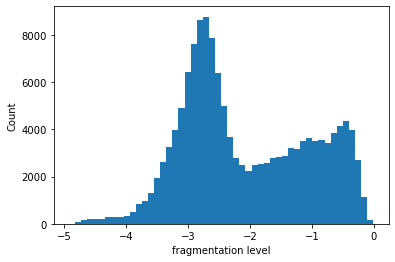

In [22]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(np.log10(np.array(frag_levels)), 50);
plt.xlabel('fragmentation level')
plt.ylabel('Count')